# Artificial Intelligence CA5(P2) Report Codes
## Mohammad Azimopur, 810197657

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "/content/drive/MyDrive/xray.zip" .

In [5]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [6]:
from tensorflow.keras import *
from sklearn.metrics import classification_report
import numpy as np
import matplotlib as mpl

# PART 1

In [18]:
DataGen=preprocessing.image.ImageDataGenerator()

In [19]:
TrainData=DataGen.flow_from_directory("/content/Data/train",target_size=(80,80),color_mode="grayscale",batch_size=32)

Found 5144 images belonging to 3 classes.


In [20]:
TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32)

Found 1288 images belonging to 3 classes.


# PART 2

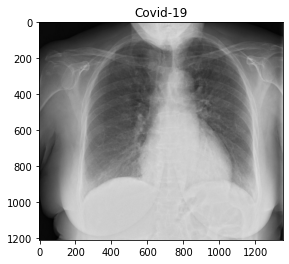

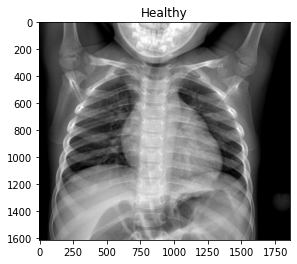

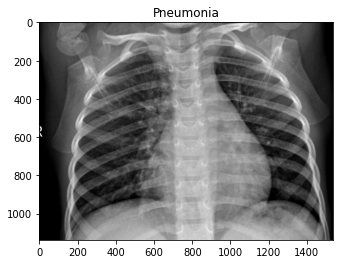

In [21]:
cov=mpl.image.imread("/content/Data/train/COVID19/COVID19(100).jpg")
mpl.pyplot.title("Covid-19")
mpl.pyplot.imshow(cov,cmap='gray')
mpl.pyplot.show()

hlt=mpl.image.imread("/content/Data/train/NORMAL/NORMAL(100).jpg")
mpl.pyplot.title("Healthy")
mpl.pyplot.imshow(hlt,cmap='gray')
mpl.pyplot.show()

pnu=mpl.image.imread("/content/Data/train/PNEUMONIA/PNEUMONIA(100).jpg")
mpl.pyplot.title("Pneumonia")
mpl.pyplot.imshow(pnu,cmap='gray')
mpl.pyplot.show()

Train Data:
Covid-19 Pictures: 460 Normal Pictures: 1266 Pneumonia Pictures: 3418


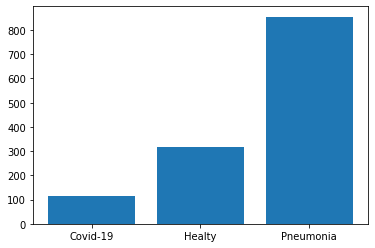

test Data:
Covid-19 Pictures: 116 Normal Pictures: 317 Pneumonia Pictures: 855


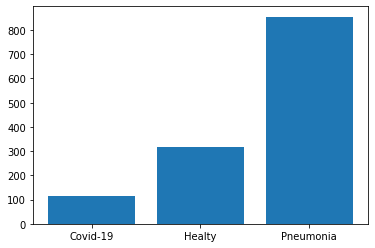

In [22]:
ytrain=TrainData.classes
ytest=TestData.classes
t_cov_train=0
t_cov_test=0
t_hlt_train=0
t_hlt_test=0
t_pnu_train=0
t_pnu_test=0
for i in range(len(ytrain)):
  if(ytrain[i]==0):
    t_cov_train=t_cov_train+1
  elif(ytrain[i]==1):
    t_hlt_train=t_hlt_train+1
  elif(ytrain[i]==2):
    t_pnu_train=t_pnu_train+1
for i in range(len(ytest)):
  if(ytest[i]==0):
    t_cov_test=t_cov_test+1
  elif(ytest[i]==1):
    t_hlt_test=t_hlt_test+1
  elif(ytest[i]==2):
    t_pnu_test=t_pnu_test+1

print("Train Data:")
print("Covid-19 Pictures:",t_cov_train,"Normal Pictures:",t_hlt_train,"Pneumonia Pictures:",t_pnu_train)
mpl.pyplot.bar(["Covid-19","Healty","Pneumonia"],[t_cov_test,t_hlt_test,t_pnu_test])
mpl.pyplot.show()

print("test Data:")
print("Covid-19 Pictures:",t_cov_test,"Normal Pictures:",t_hlt_test,"Pneumonia Pictures:",t_pnu_test)
mpl.pyplot.bar(["Covid-19","Healty","Pneumonia"],[t_cov_test,t_hlt_test,t_pnu_test])
mpl.pyplot.show()

# PART 3

In [23]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=["accuracy"])
FFNN.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


# PART4 - relu()

In [24]:
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 149s 922ms/step - loss: nan - accuracy: 0.1565 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 145s 902ms/step - loss: nan - accuracy: 0.0878 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 146s 908ms/step - loss: nan - accuracy: 0.0833 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 144s 895ms/step - loss: nan - accuracy: 0.0842 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 144s 896ms/step - loss: nan - accuracy: 0.0844 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 144s 895ms/step - loss: nan - accuracy: 0.0826 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 144s 897ms/step - loss: nan - accuracy: 0.0840 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

In [25]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


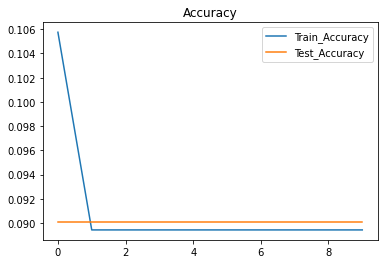

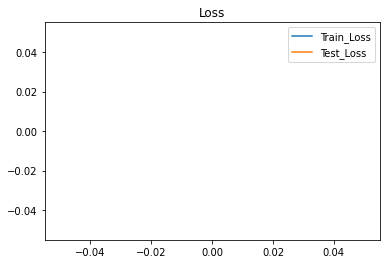

In [26]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PArt4 - tanh()

In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="tanh")(oup)
oup=layers.Dense(1024,activation="tanh")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 163s 1s/step - loss: 1.5884 - accuracy: 0.5297 - val_loss: 1.6946 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 160s 997ms/step - loss: 1.0534 - accuracy: 0.5986 - val_loss: 0.8352 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 159s 987ms/step - loss: 0.9784 - accuracy: 0.5969 - val_loss: 0.8897 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 158s 985ms/step - loss: 0.9272 - accuracy: 0.6065 - val_loss: 0.8968 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 158s 981ms/step - loss: 0.9075 - accuracy: 0.6277 - val_loss: 1.0797 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 157s 977ms/step - loss: 0.9066 - accuracy: 0.6406 - val_loss: 0.8723 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 157s 973ms/step - loss: 0.8729 - accuracy: 0.6511 - val_loss: 0.8952 - va

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



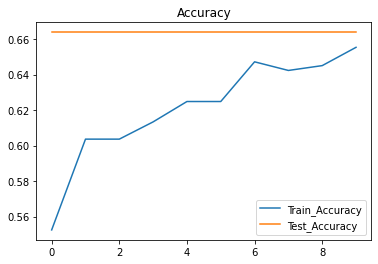

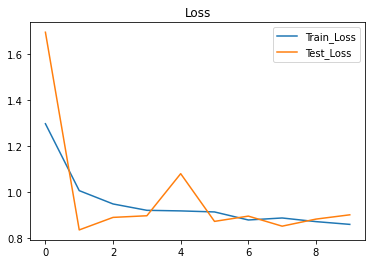

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PART 5

In [7]:
DataGen=preprocessing.image.ImageDataGenerator(rescale=1/255.0)
TrainData=DataGen.flow_from_directory("/content/Data/train",target_size=(80,80),color_mode="grayscale",batch_size=32)
TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 163s 1s/step - loss: 0.7661 - accuracy: 0.6733 - val_loss: 0.4205 - val_accuracy: 0.7950
Epoch 2/10
161/161 [==============================] - 162s 1s/step - loss: 0.3839 - accuracy: 0.8495 - val_loss: 0.2943 - val_accuracy: 0.8967
Epoch 3/10
161/161 [==============================] - 162s 1s/step - loss: 0.3459 - accuracy: 0.8663 - val_loss: 0.2166 - val_accuracy: 0.9255
Epoch 4/10
161/161 [==============================] - 161s 1s/step - loss: 0.2918 - accuracy: 0.8868 - val_loss: 0.1958 - val_accuracy: 0.9317
Epoch 5/10
161/161 [==============================] - 159s 990ms/step - loss: 0.2853 - accuracy: 0.8918 - val_loss: 0.2033 - val_accuracy: 0.9278
Epoch 6/10
161/161 [==============================] - 159s 986ms/step - loss: 0.2648 - accuracy: 0.8967 - val_loss: 0.1854 - val_accuracy: 0.9387
Epoch 7/10
161/161 [==============================] - 158s 985ms/step - loss: 0.2408 - accuracy: 0.9100 - val_loss: 0.2016 - val_accurac

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       116
           1       0.82      0.95      0.88       317
           2       0.98      0.92      0.95       855

    accuracy                           0.93      1288
   macro avg       0.91      0.92      0.91      1288
weighted avg       0.93      0.93      0.93      1288



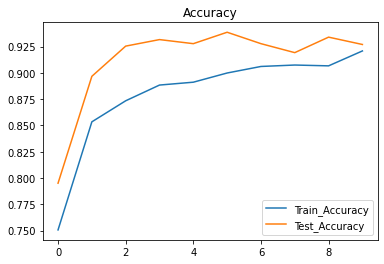

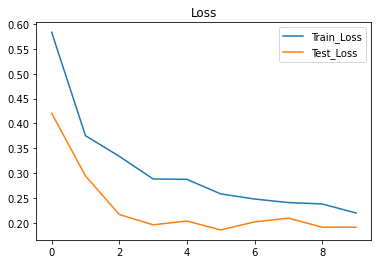

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PART 6
momentum=0.5

In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.5),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 163s 1s/step - loss: 0.6666 - accuracy: 0.7235 - val_loss: 0.2661 - val_accuracy: 0.9037
Epoch 2/10
161/161 [==============================] - 161s 1s/step - loss: 0.3598 - accuracy: 0.8526 - val_loss: 0.2808 - val_accuracy: 0.8960
Epoch 3/10
161/161 [==============================] - 160s 994ms/step - loss: 0.2584 - accuracy: 0.9016 - val_loss: 0.2150 - val_accuracy: 0.9169
Epoch 4/10
161/161 [==============================] - 161s 999ms/step - loss: 0.2591 - accuracy: 0.9063 - val_loss: 0.2405 - val_accuracy: 0.8967
Epoch 5/10
161/161 [==============================] - 161s 999ms/step - loss: 0.2446 - accuracy: 0.9091 - val_loss: 0.2191 - val_accuracy: 0.9154
Epoch 6/10
161/161 [==============================] - 161s 1000ms/step - loss: 0.2509 - accuracy: 0.9004 - val_loss: 0.1881 - val_accuracy: 0.9317
Epoch 7/10
161/161 [==============================] - 160s 992ms/step - loss: 0.2137 - accuracy: 0.9110 - val_loss: 0.1645 - val_

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       116
           1       0.88      0.94      0.91       317
           2       0.98      0.94      0.96       855

    accuracy                           0.94      1288
   macro avg       0.91      0.94      0.92      1288
weighted avg       0.94      0.94      0.94      1288



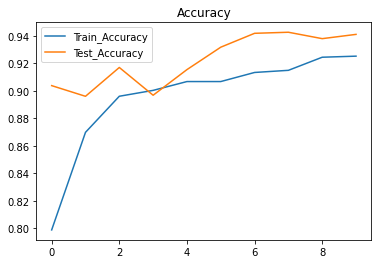

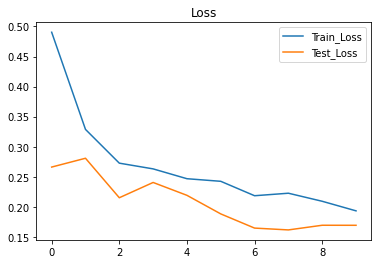

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

momentum=0.9

In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.9),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 161s 1000ms/step - loss: 0.6494 - accuracy: 0.7265 - val_loss: 0.2685 - val_accuracy: 0.8991
Epoch 2/10
161/161 [==============================] - 160s 994ms/step - loss: 0.3289 - accuracy: 0.8779 - val_loss: 0.3121 - val_accuracy: 0.8610
Epoch 3/10
161/161 [==============================] - 159s 991ms/step - loss: 0.3207 - accuracy: 0.8737 - val_loss: 0.3010 - val_accuracy: 0.8936
Epoch 4/10
161/161 [==============================] - 160s 993ms/step - loss: 0.3322 - accuracy: 0.8693 - val_loss: 0.1923 - val_accuracy: 0.9247
Epoch 5/10
161/161 [==============================] - 159s 992ms/step - loss: 0.2377 - accuracy: 0.9084 - val_loss: 0.3051 - val_accuracy: 0.8804
Epoch 6/10
161/161 [==============================] - 159s 989ms/step - loss: 0.2457 - accuracy: 0.9129 - val_loss: 0.3379 - val_accuracy: 0.8742
Epoch 7/10
161/161 [==============================] - 159s 992ms/step - loss: 0.2323 - accuracy: 0.9093 - val_loss: 0.1899 

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       1.00      0.72      0.84       116
           1       0.86      0.89      0.87       317
           2       0.95      0.97      0.96       855

    accuracy                           0.93      1288
   macro avg       0.93      0.86      0.89      1288
weighted avg       0.93      0.93      0.93      1288



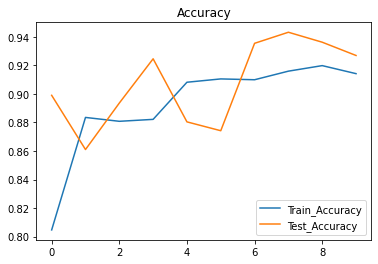

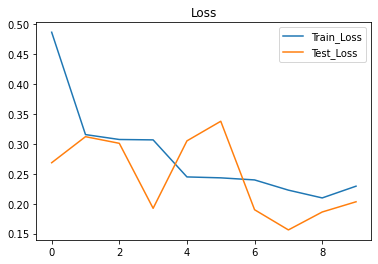

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

momentum=0.99

In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.SGD(learning_rate=0.01,momentum=0.99),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 160s 995ms/step - loss: 0.7223 - accuracy: 0.7359 - val_loss: 0.2581 - val_accuracy: 0.9154
Epoch 2/10
161/161 [==============================] - 160s 992ms/step - loss: 0.4497 - accuracy: 0.8298 - val_loss: 0.3344 - val_accuracy: 0.8804
Epoch 3/10
161/161 [==============================] - 160s 995ms/step - loss: 0.4148 - accuracy: 0.8614 - val_loss: 0.5796 - val_accuracy: 0.7640
Epoch 4/10
161/161 [==============================] - 159s 991ms/step - loss: 0.9054 - accuracy: 0.7007 - val_loss: 0.8410 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 160s 992ms/step - loss: 0.8406 - accuracy: 0.6729 - val_loss: 0.8396 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 159s 990ms/step - loss: 0.8448 - accuracy: 0.6582 - val_loss: 0.8358 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 160s 995ms/step - loss: 0.8522 - accuracy: 0.6571 - val_loss: 0.8345 -

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


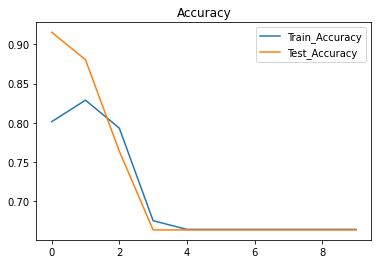

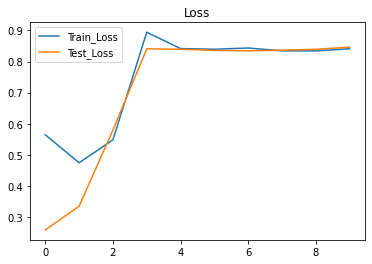

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PART 6 - Adam

In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=10)

Epoch 1/10
161/161 [==============================] - 162s 1s/step - loss: 1.9642 - accuracy: 0.6911 - val_loss: 0.2507 - val_accuracy: 0.9076
Epoch 2/10
161/161 [==============================] - 161s 998ms/step - loss: 0.3164 - accuracy: 0.8830 - val_loss: 0.2238 - val_accuracy: 0.9115
Epoch 3/10
161/161 [==============================] - 160s 999ms/step - loss: 0.3107 - accuracy: 0.8801 - val_loss: 0.2073 - val_accuracy: 0.9231
Epoch 4/10
161/161 [==============================] - 161s 999ms/step - loss: 0.2782 - accuracy: 0.8874 - val_loss: 0.1913 - val_accuracy: 0.9293
Epoch 5/10
161/161 [==============================] - 161s 999ms/step - loss: 0.2506 - accuracy: 0.9021 - val_loss: 0.1807 - val_accuracy: 0.9363
Epoch 6/10
161/161 [==============================] - 161s 1000ms/step - loss: 0.2541 - accuracy: 0.9058 - val_loss: 0.2178 - val_accuracy: 0.9208
Epoch 7/10
161/161 [==============================] - 161s 1s/step - loss: 0.2229 - accuracy: 0.9198 - val_loss: 0.1788 - val_

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.99      0.81      0.89       116
           1       0.90      0.89      0.89       317
           2       0.95      0.98      0.96       855

    accuracy                           0.94      1288
   macro avg       0.95      0.89      0.92      1288
weighted avg       0.94      0.94      0.94      1288



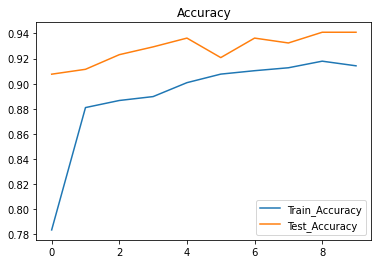

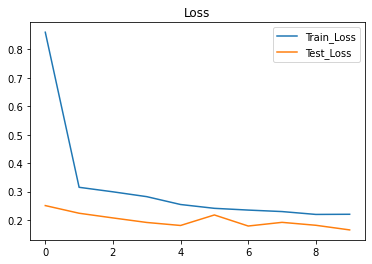

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PART 7

In [ ]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=20)

Epoch 1/20
161/161 [==============================] - 144s 889ms/step - loss: 2.0470 - accuracy: 0.6742 - val_loss: 0.2650 - val_accuracy: 0.8998
Epoch 2/20
161/161 [==============================] - 143s 891ms/step - loss: 0.3476 - accuracy: 0.8600 - val_loss: 0.2576 - val_accuracy: 0.8991
Epoch 3/20
161/161 [==============================] - 143s 891ms/step - loss: 0.2934 - accuracy: 0.8895 - val_loss: 0.3179 - val_accuracy: 0.8851
Epoch 4/20
161/161 [==============================] - 144s 896ms/step - loss: 0.2543 - accuracy: 0.9047 - val_loss: 0.2437 - val_accuracy: 0.9084
Epoch 5/20
161/161 [==============================] - 146s 905ms/step - loss: 0.2843 - accuracy: 0.8913 - val_loss: 0.2856 - val_accuracy: 0.8991
Epoch 6/20
161/161 [==============================] - 143s 892ms/step - loss: 0.2686 - accuracy: 0.8953 - val_loss: 0.2986 - val_accuracy: 0.8866
Epoch 7/20
161/161 [==============================] - 143s 888ms/step - loss: 0.2580 - accuracy: 0.8955 - val_loss: 0.2261 -

In [ ]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       1.00      0.69      0.82       116
           1       0.92      0.88      0.90       317
           2       0.93      0.98      0.95       855

    accuracy                           0.93      1288
   macro avg       0.95      0.85      0.89      1288
weighted avg       0.93      0.93      0.93      1288



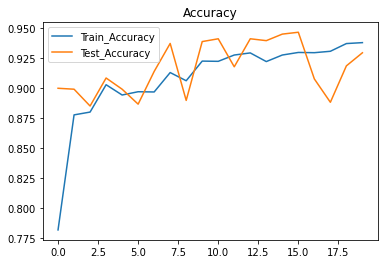

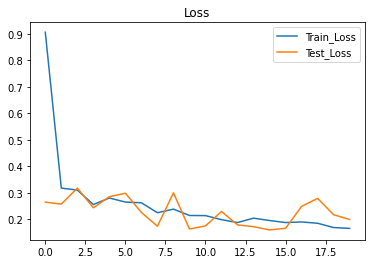

In [ ]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PART 8

In [8]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="mse",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=20)

Epoch 1/20
161/161 [==============================] - 152s 941ms/step - loss: 0.2148 - accuracy: 0.6646 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 152s 947ms/step - loss: 0.2283 - accuracy: 0.6576 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 152s 942ms/step - loss: 0.2241 - accuracy: 0.6638 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 152s 946ms/step - loss: 0.2304 - accuracy: 0.6545 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 154s 961ms/step - loss: 0.2211 - accuracy: 0.6684 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 154s 959ms/step - loss: 0.2203 - accuracy: 0.6695 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 155s 963ms/step - loss: 0.2243 - accuracy: 0.6636 - val_loss: 0.2241 -

In [9]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



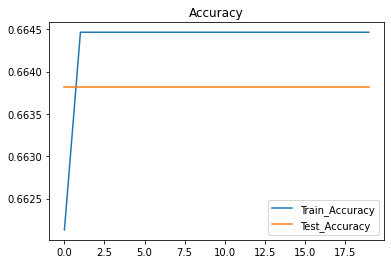

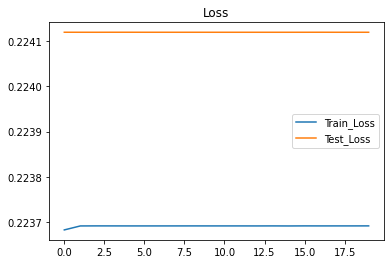

In [10]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

# PART 9
L2

In [11]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu",kernel_regularizer=regularizers.L2(0.0001))(oup)
oup=layers.Dense(1024,activation="relu",kernel_regularizer=regularizers.L2(0.0001))(oup)
oup=layers.Dense(3,activation="softmax",kernel_regularizer=regularizers.L2(0.0001))(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=20)

Epoch 1/20
161/161 [==============================] - 154s 959ms/step - loss: 1.9966 - accuracy: 0.6840 - val_loss: 0.4005 - val_accuracy: 0.9053
Epoch 2/20
161/161 [==============================] - 154s 959ms/step - loss: 0.4990 - accuracy: 0.8672 - val_loss: 0.4043 - val_accuracy: 0.9130
Epoch 3/20
161/161 [==============================] - 154s 959ms/step - loss: 0.4552 - accuracy: 0.8752 - val_loss: 0.3583 - val_accuracy: 0.9099
Epoch 4/20
161/161 [==============================] - 152s 948ms/step - loss: 0.3744 - accuracy: 0.9002 - val_loss: 0.3119 - val_accuracy: 0.9293
Epoch 5/20
161/161 [==============================] - 154s 960ms/step - loss: 0.3505 - accuracy: 0.9057 - val_loss: 0.2849 - val_accuracy: 0.9301
Epoch 6/20
161/161 [==============================] - 155s 963ms/step - loss: 0.3182 - accuracy: 0.9151 - val_loss: 0.2633 - val_accuracy: 0.9379
Epoch 7/20
161/161 [==============================] - 154s 961ms/step - loss: 0.3014 - accuracy: 0.9132 - val_loss: 0.2898 -

In [12]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       116
           1       0.97      0.70      0.81       317
           2       0.89      0.99      0.94       855

    accuracy                           0.91      1288
   macro avg       0.94      0.86      0.89      1288
weighted avg       0.91      0.91      0.91      1288



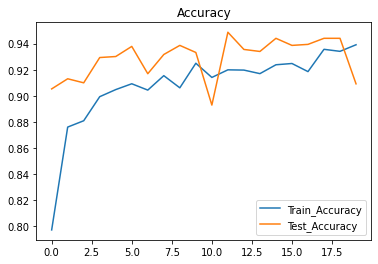

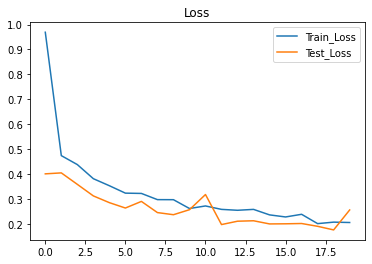

In [13]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()

Dropout

In [15]:
inp=layers.Input(shape=(80,80,1))
oup=layers.Flatten()(inp)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dropout(0.1)(oup)
oup=layers.Dense(1024,activation="relu")(oup)
oup=layers.Dropout(0.1)(oup)
oup=layers.Dense(3,activation="softmax")(oup)

FFNN=models.Model(inputs=inp,outputs=oup)
FFNN.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
hist=FFNN.fit(TrainData,validation_data=TestData,epochs=20)

Epoch 1/20
161/161 [==============================] - 157s 974ms/step - loss: 1.4485 - accuracy: 0.6886 - val_loss: 0.2238 - val_accuracy: 0.9193
Epoch 2/20
161/161 [==============================] - 156s 973ms/step - loss: 0.3235 - accuracy: 0.8800 - val_loss: 0.2342 - val_accuracy: 0.9161
Epoch 3/20
161/161 [==============================] - 157s 976ms/step - loss: 0.3343 - accuracy: 0.8852 - val_loss: 0.2073 - val_accuracy: 0.9309
Epoch 4/20
161/161 [==============================] - 157s 975ms/step - loss: 0.2909 - accuracy: 0.8972 - val_loss: 0.2742 - val_accuracy: 0.8936
Epoch 5/20
161/161 [==============================] - 157s 976ms/step - loss: 0.2838 - accuracy: 0.8951 - val_loss: 0.2211 - val_accuracy: 0.9107
Epoch 6/20
161/161 [==============================] - 157s 978ms/step - loss: 0.2785 - accuracy: 0.8953 - val_loss: 0.2889 - val_accuracy: 0.8851
Epoch 7/20
161/161 [==============================] - 157s 975ms/step - loss: 0.2650 - accuracy: 0.8991 - val_loss: 0.2015 -

In [16]:
_TestData=DataGen.flow_from_directory("/content/Data/test",target_size=(80,80),color_mode="grayscale",batch_size=32,shuffle=False)
_res=FFNN.predict(_TestData)

Found 1288 images belonging to 3 classes.


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       116
           1       0.94      0.88      0.91       317
           2       0.94      0.98      0.96       855

    accuracy                           0.95      1288
   macro avg       0.95      0.92      0.93      1288
weighted avg       0.95      0.95      0.95      1288



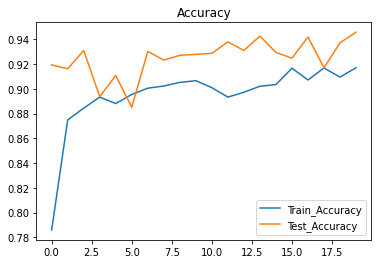

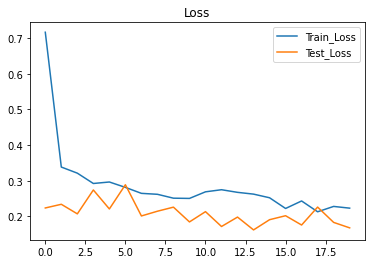

In [17]:
print(classification_report(_TestData.classes,backend.argmax(_res)))
mpl.pyplot.figure(1)
mpl.pyplot.plot(hist.history['accuracy'])
mpl.pyplot.plot(hist.history['val_accuracy'])
mpl.pyplot.legend(["Train_Accuracy","Test_Accuracy"])
mpl.pyplot.title("Accuracy")
mpl.pyplot.show()
mpl.pyplot.close()
mpl.pyplot.figure(2)
mpl.pyplot.plot(hist.history['loss'])
mpl.pyplot.plot(hist.history['val_loss'])
mpl.pyplot.legend(["Train_Loss","Test_Loss"])
mpl.pyplot.title("Loss")
mpl.pyplot.show()
mpl.pyplot.close()